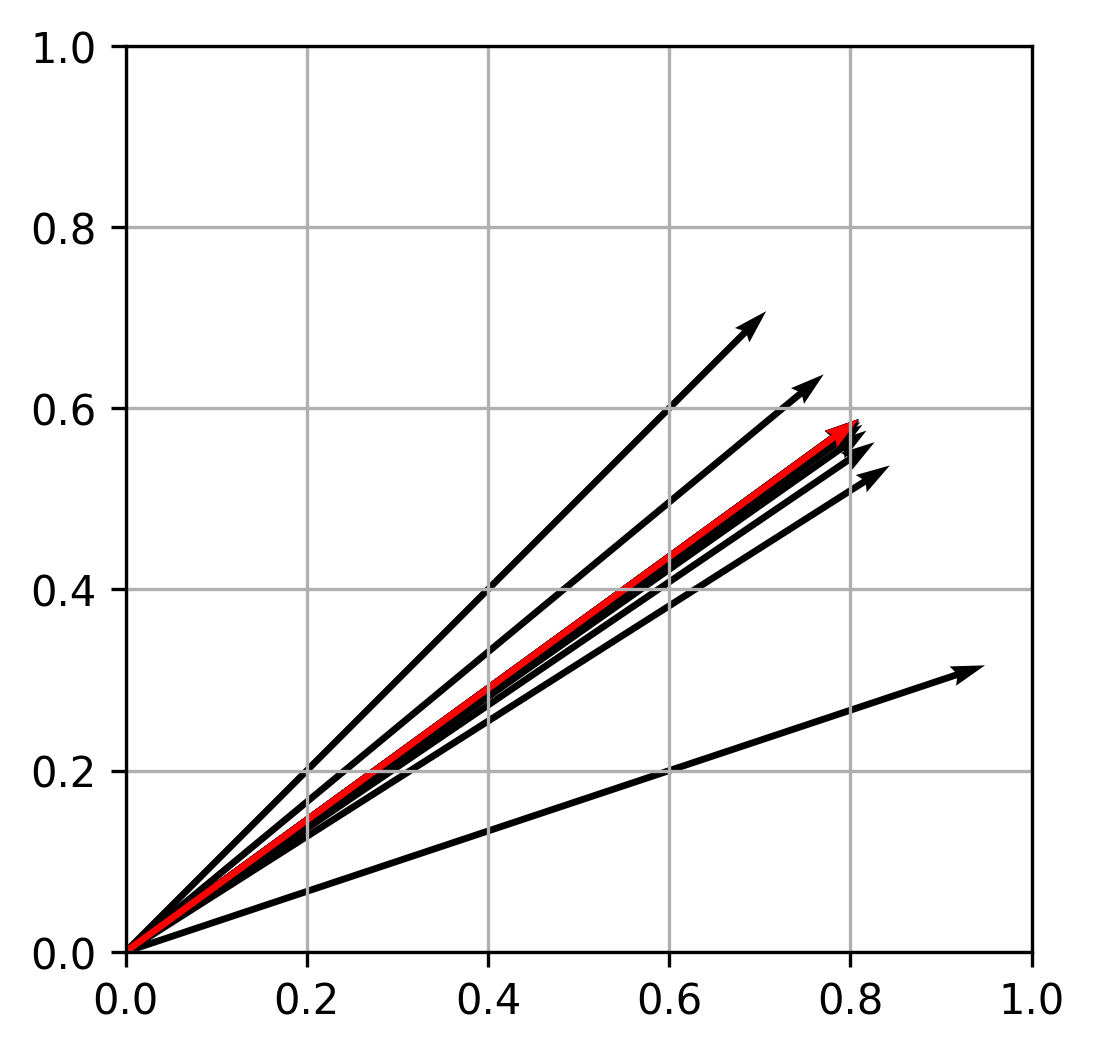

使用CORDIC计算sin(36):	0.5878013447718513
使用math库计算sin(36):	0.5877852522924731


In [ ]:
import math
import matplotlib.pyplot as plt
NUMB_ITER = 16
ANGLES = [
    math.atan(2**(-i)) for i in range(NUMB_ITER)
]
K = 1
for i in range(NUMB_ITER):
    K *= math.cos(ANGLES[i])

def cordic_sin(theta):
    plt.rcParams['figure.dpi'] = 300
    fig, ax = plt.subplots()
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])
    ax.set_aspect('equal', adjustable='box')
    x = math.cos(theta)
    y = math.sin(theta)
    ax.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color='blue')
    while 1:
        if theta > math.pi / 2:
            theta = math.pi - theta
        elif theta < -math.pi / 2:
            theta = -math.pi - theta
        else:
            break
    x = 1
    y = 0
    z = theta
    for i in range(NUMB_ITER):
        d = 1 if z >= 0 else -1
        x_next = x - d * y * 2**(-i)
        y_next = y + d * x * 2**(-i)
        z_next = z - d * ANGLES[i]
        x = x_next * math.cos(ANGLES[i])
        y = y_next * math.cos(ANGLES[i])
        z = z_next
        ax.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color='red' if i == NUMB_ITER-1 else 'black')
    ax.grid(True)
    plt.show()
    return y

angle_in_degree = 36
angle_in_rad = angle_in_degree / 180 * math.pi
result = cordic_sin(angle_in_rad)
print(f"使用CORDIC计算sin({angle_in_degree}):\t{result}")
print(f"使用math库计算sin({angle_in_degree}):\t{math.sin(angle_in_rad)}")